In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def circle_and_ring_sampling(n, radius, eps=0):
    half_n = n // 2
    x1 = np.zeros((half_n, 2))
    r = np.random.uniform(0, radius / 2, half_n) + np.random.uniform(-eps, eps, half_n)
    phi = np.random.uniform(0, 2 * np.pi, half_n)
    x1[:, 0] = r * np.sin(phi)
    x1[:, 1] = r * np.cos(phi)

    x2 = np.zeros((half_n, 2))
    r = np.random.uniform(radius / 2, radius, half_n) + np.random.uniform(-eps, eps, half_n)
    phi = np.random.uniform(0, 2 * np.pi, half_n)
    x2[:, 0] = r * np.sin(phi)
    x2[:, 1] = r * np.cos(phi)

    return x1, x2

def xor_sampling(n, length, eps=0):
    half_n = n // 2
    x1 = np.zeros((half_n, 2))
    x1[:, 0] = np.concatenate((np.random.uniform(0, length, half_n // 2), np.random.uniform(-length, 0, half_n // 2))) + np.random.uniform(-eps, eps, half_n)
    x1[:, 1] = np.concatenate((np.random.uniform(0, length, half_n // 2), np.random.uniform(-length, 0, half_n // 2))) + np.random.uniform(-eps, eps, half_n)

    x2 = np.zeros((half_n, 2))
    x2[:, 0] = np.concatenate((np.random.uniform(0, length, half_n // 2), np.random.uniform(-length, 0, half_n // 2))) + np.random.uniform(-eps, eps, half_n)
    x2[:, 1] = np.concatenate((np.random.uniform(-length, 0, half_n // 2), np.random.uniform(0, length, half_n // 2))) + np.random.uniform(-eps, eps, half_n)

    return x1, x2

def two_circles_sampling(n, length, eps=0):
    half_n = n // 2

    x1 = np.zeros((half_n, 2))
    r1 = np.random.uniform(0, length // 2, half_n)
    phi1 = np.random.uniform(0, 2 * np.pi, half_n)
    x1[:, 0] = r1 * np.cos(phi1) + np.random.uniform(-eps, eps, half_n) + length // 2
    x1[:, 1] = r1 * np.sin(phi1) + np.random.uniform(-eps, eps, half_n) + length // 2

    x2 = np.zeros((half_n, 2))
    r2 = np.random.uniform(0, length // 2, half_n)
    phi2 = np.random.uniform(0, 2 * np.pi, half_n)
    x2[:, 0] = r2 * np.cos(phi2) + np.random.uniform(-eps, eps, half_n) - length // 2
    x2[:, 1] = r2 * np.sin(phi2) + np.random.uniform(-eps, eps, half_n) - length // 2

    return x1, x2


def spirale_sampling(n, radius, eps=0):
    half_n = n // 2

    x1 = np.zeros((half_n, 2))
    r = np.abs(np.random.uniform(0, radius, half_n))
    r1 = r + np.random.uniform(-eps, eps, half_n)
    phi = r
    x1[:, 0] = r1 * np.cos(phi)
    x1[:, 1] = r1 * np.sin(phi)

    x2 = np.zeros((half_n, 2))
    r = np.abs(np.random.uniform(0, radius, half_n))
    r2 = r + np.random.uniform(-eps, eps, half_n)
    phi = r + np.pi
    x2[:, 0] = r2 * np.cos(phi)
    x2[:, 1] = r2 * np.sin(phi)

    return x1, x2

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

def tanh(x):
    return torch.tanh(x)

def relu(x):
    return torch.relu(x)

class MultilayerPerceptron(nn.Module):
    def __init__(self, layer_dims, activation='relu'):
        super(MultilayerPerceptron, self).__init__()

        self.activation = activation
        self.layers = nn.ModuleList()

        for i in range(len(layer_dims) - 1):
            self.layers.append(nn.Linear(layer_dims[i], layer_dims[i + 1]))

    def forward(self, x):
        for layer in self.layers[:-1]:
            if self.activation == 'sigmoid':
                x = sigmoid(layer(x))
            elif self.activation == 'tanh':
                x = tanh(layer(x))
            elif self.activation == 'relu':
                x = relu(layer(x))

        x = self.layers[-1](x)
        return x

    def fit(self, x_train, y_train, learning_rate=0.01, batch_size=32, epochs=1000, logs=False):
        loss = 0.0
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(self.parameters(), lr=learning_rate)

        for epoch in range(epochs):
            for i in range(0, len(x_train), batch_size):
                inputs = torch.tensor(x_train[i:i + batch_size], dtype=torch.float32)
                targets = torch.tensor(y_train[i:i + batch_size], dtype=torch.long)

                optimizer.zero_grad()
                outputs = self(inputs)
                loss = criterion(outputs, targets)
                loss.backward()
                optimizer.step()

            if logs:
              print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}")


    def predict(self, x):
        with torch.no_grad():
            inputs = torch.tensor(x, dtype=torch.float32)
            outputs = self(inputs)
            _, predicted = torch.max(outputs, 1)
            return predicted.numpy()

In [ ]:
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, make_scorer, accuracy_score

def fit_check_metrics(model, x, y, learning_rate=0.01, batch_size=32, epochs=1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

    start_time = time()
    model.fit(x_train, y_train, learning_rate, batch_size, epochs)
    end_time = time()

    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)

    print(f'Accuracy: {accuracy}')
    print(f'Fit time: {end_time - start_time} seconds')

    ConfusionMatrixDisplay(matrix, display_labels=[0, 1]).plot(
        include_values=True, cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()

Accuracy: 0.94
Fit time: 21.547434091567993 seconds


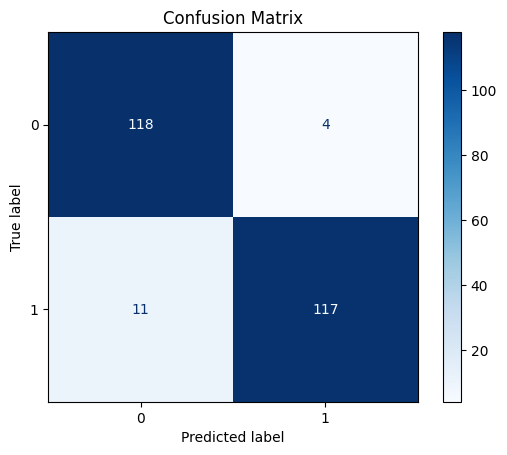

In [ ]:
N = 1000
x1, x2 = circle_and_ring_sampling(1000, 10, 1.5)
x = np.concatenate((x1, x2))
y = np.concatenate((np.zeros(N // 2), np.ones(N // 2)))

model = MultilayerPerceptron([2, 5, 2], activation='relu')

fit_check_metrics(model, x, y)

Accuracy: 0.904
Fit time: 19.799880266189575 seconds


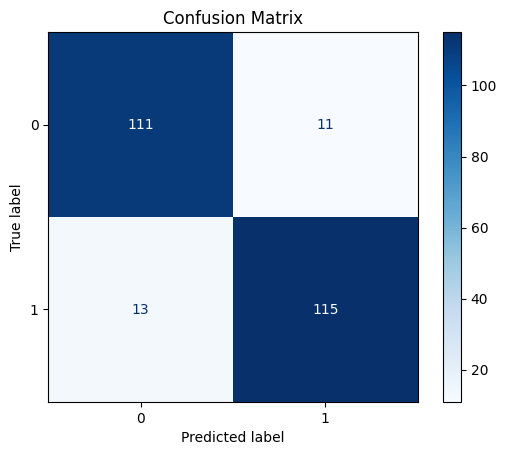

In [ ]:
N = 1000
x1, x2 = xor_sampling(1000, 10, 1.5)
x = np.concatenate((x1, x2))
y = np.concatenate((np.zeros(N // 2), np.ones(N // 2)))

model = MultilayerPerceptron([2, 4, 3], activation='relu')
fit_check_metrics(model, x, y)

Accuracy: 0.984
Fit time: 11.69184947013855 seconds


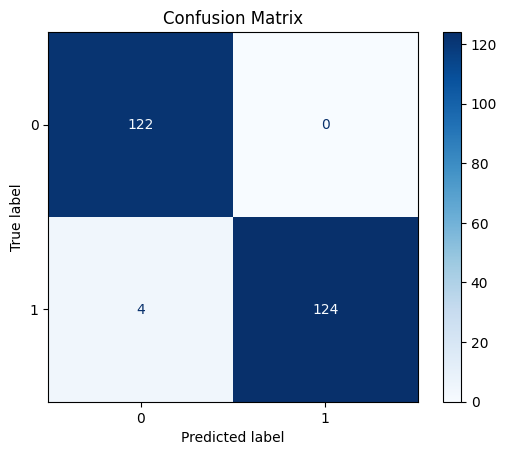

In [ ]:
N = 1000
x1, x2 = two_circles_sampling(1000, 10, 4.5)
x = np.concatenate((x1, x2))
y = np.concatenate((np.zeros(N // 2), np.ones(N // 2)))

model = MultilayerPerceptron([2, 2], activation='relu')
fit_check_metrics(model, x, y)

Accuracy: 0.93
Fit time: 38.45337438583374 seconds


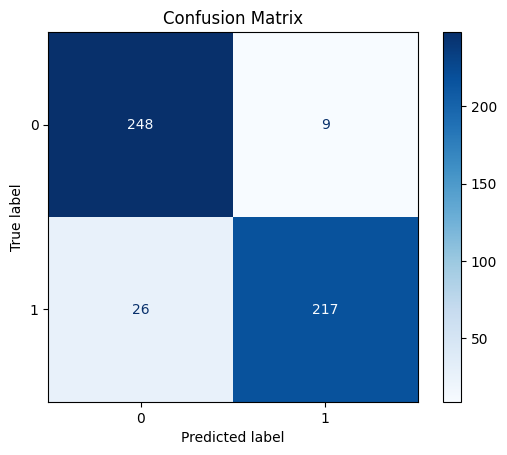

In [ ]:
N = 2000
x1, x2 = spirale_sampling(N, 10, 1.5)
x = np.concatenate((x1, x2))
y = np.concatenate((np.zeros(N // 2), np.ones(N // 2)))

model = MultilayerPerceptron([2, 5, 5, 5, 5], activation='relu')
fit_check_metrics(model, x, y)

In [ ]:
import copy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def test_model_by_sample_size(model, gen_sample):
  for n in range(100, 5000, 100):
    print(f"Test with sample size: {n}")
    model_copy = copy.deepcopy(model)
    x1, x2 = gen_sample(n)
    x = np.concatenate((x1, x2))
    y = np.concatenate((np.zeros(n // 2), np.ones(n // 2)))

    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

    model_copy.fit(x_train, y_train)

    y_pred = model_copy.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')

    if accuracy >= 0.9:
      print(f"Found sample size: {n}")
      return

In [ ]:
model = MultilayerPerceptron([2, 5, 2], activation='relu')
test_model_by_sample_size(model, lambda n: circle_and_ring_sampling(n, 10, 1.5))

Test with sample size: 100
Accuracy: 0.88
Test with sample size: 200
Accuracy: 0.8
Test with sample size: 300
Accuracy: 0.9066666666666666
Found sample size: 300


In [ ]:
model = MultilayerPerceptron([2, 4, 2], activation='relu')
test_model_by_sample_size(model, lambda n: xor_sampling(n, 10, 1.5))

Test with sample size: 100
Accuracy: 0.92
Found sample size: 100


In [ ]:
model = MultilayerPerceptron([2, 2], activation='relu')
test_model_by_sample_size(model, lambda n: two_circles_sampling(n, 10, 6))

Test with sample size: 100
Accuracy: 1.0
Found sample size: 100


In [ ]:
model = MultilayerPerceptron([2, 5, 5, 5, 5, 2], activation='relu')
test_model_by_sample_size(model, lambda n: spirale_sampling(n, 10, 1.5))

Test with sample size: 100
Accuracy: 0.48
Test with sample size: 200
Accuracy: 0.52
Test with sample size: 300
Accuracy: 0.6533333333333333
Test with sample size: 400
Accuracy: 0.58
Test with sample size: 500
Accuracy: 0.752
Test with sample size: 600
Accuracy: 0.6733333333333333
Test with sample size: 700
Accuracy: 0.6971428571428572
Test with sample size: 800
Accuracy: 0.71
Test with sample size: 900
Accuracy: 0.9155555555555556
Found sample size: 900


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def cross_validate(model, x, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True)
    accuracies = []

    for train_index, test_index in kf.split(x):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    return np.mean(accuracies)

In [ ]:
def test_model_by_activation_and_layer_count(activations, layers, sample_gen):
  x, y = sample_gen()
  for activation in activations:
    for layer_dims in layers:
      print(f"Test (layer_dims={layer_dims}, activation={activation}):")
      model = MultilayerPerceptron(layer_dims=layer_dims, activation=activation)
      accuracy = cross_validate(model, x, y)
      print(f"Accuracy: {accuracy}")

In [ ]:
activations = ['sigmoid', 'tanh', 'relu']
layers = [[2, 5, 2]]
def circle_and_ring_sample_gen():
  n = 300
  x1, x2 = circle_and_ring_sampling(n, 10, 1.5)
  x = np.concatenate((x1, x2))
  y = np.concatenate((np.zeros(n // 2), np.ones(n // 2)))
  return x, y

test_model_by_activation_and_layer_count(activations, layers, circle_and_ring_sample_gen)

Test (layer_dims=[2, 5, 2], activation=sigmoid):
Accuracy: 0.93
Test (layer_dims=[2, 5, 2], activation=tanh):
Accuracy: 0.9333333333333333
Test (layer_dims=[2, 5, 2], activation=relu):
Accuracy: 0.9333333333333332


In [ ]:

activations = ['relu']
layers = [[2, 2], [2, 5, 2], [2, 5, 5, 2], [2, 5, 5, 5, 2], [2, 5, 5, 5, 5, 2]]

test_model_by_activation_and_layer_count(activations, layers, circle_and_ring_sample_gen)

Test (layer_dims=[2, 2], activation=relu):
Accuracy: 0.37
Test (layer_dims=[2, 5, 2], activation=relu):
Accuracy: 0.9133333333333333
Test (layer_dims=[2, 5, 5, 2], activation=relu):
Accuracy: 0.9033333333333331
Test (layer_dims=[2, 5, 5, 5, 2], activation=relu):
Accuracy: 0.9099999999999999
Test (layer_dims=[2, 5, 5, 5, 5, 2], activation=relu):
Accuracy: 0.9233333333333332


In [ ]:

activations = ['sigmoid', 'tanh', 'relu']
layers = [[2, 4, 2]]
def xor_sample_gen():
  n = 200
  x1, x2 = xor_sampling(n, 10, 1.5)
  x = np.concatenate((x1, x2))
  y = np.concatenate((np.zeros(n // 2), np.ones(n // 2)))
  return x, y

test_model_by_activation_and_layer_count(activations, layers, xor_sample_gen)

Test (layer_dims=[2, 4, 2], activation=sigmoid):
Accuracy: 0.825
Test (layer_dims=[2, 4, 2], activation=tanh):
Accuracy: 0.89
Test (layer_dims=[2, 4, 2], activation=relu):
Accuracy: 0.925


In [ ]:

activations = ['relu']
layers = [[2, 2], [2, 5, 2], [2, 5, 5, 2], [2, 5, 5, 5, 2], [2, 5, 5, 5, 5, 2]]

test_model_by_activation_and_layer_count(activations, layers, xor_sample_gen)

Test (layer_dims=[2, 2], activation=relu):
Accuracy: 0.465
Test (layer_dims=[2, 5, 2], activation=relu):
Accuracy: 0.9099999999999999
Test (layer_dims=[2, 5, 5, 2], activation=relu):
Accuracy: 0.905
Test (layer_dims=[2, 5, 5, 5, 2], activation=relu):
Accuracy: 0.9
Test (layer_dims=[2, 5, 5, 5, 5, 2], activation=relu):
Accuracy: 0.8899999999999999


In [ ]:
activations = ['sigmoid', 'tanh', 'relu']
layers = [[2, 2]]
def two_circles_sample_gen():
  n = 100
  x1, x2 = two_circles_sampling(n, 10, 6)
  x = np.concatenate((x1, x2))
  y = np.concatenate((np.zeros(n // 2), np.ones(n // 2)))
  return x, y

test_model_by_activation_and_layer_count(activations, layers, two_circles_sample_gen)

Test (layer_dims=[2, 2], activation=sigmoid):
Accuracy: 0.95
Test (layer_dims=[2, 2], activation=tanh):
Accuracy: 0.95
Test (layer_dims=[2, 2], activation=relu):
Accuracy: 0.96


In [ ]:

activations = ['relu']
layers = [[2, 2], [2, 5, 2], [2, 5, 5, 2], [2, 5, 5, 5, 2], [2, 5, 5, 5, 5, 2]]

test_model_by_activation_and_layer_count(activations, layers, two_circles_sample_gen)

Test (layer_dims=[2, 2], activation=relu):
Accuracy: 0.96
Test (layer_dims=[2, 5, 2], activation=relu):
Accuracy: 0.9800000000000001
Test (layer_dims=[2, 5, 5, 2], activation=relu):
Accuracy: 0.9800000000000001
Test (layer_dims=[2, 5, 5, 5, 2], activation=relu):
Accuracy: 0.9800000000000001
Test (layer_dims=[2, 5, 5, 5, 5, 2], activation=relu):
Accuracy: 0.9800000000000001


In [ ]:

activations = ['sigmoid', 'tanh', 'relu']
layers = [[2, 5, 5, 5, 5, 2]]
def spirale_sample_gen():
  n = 900
  x1, x2 = spirale_sampling(n, 10, 1.5)
  x = np.concatenate((x1, x2))
  y = np.concatenate((np.zeros(n // 2), np.ones(n // 2)))
  return x, y

test_model_by_activation_and_layer_count(activations, layers, spirale_sample_gen)

Test (layer_dims=[2, 5, 5, 5, 5, 2], activation=sigmoid):
Accuracy: 0.5
Test (layer_dims=[2, 5, 5, 5, 5, 2], activation=tanh):
Accuracy: 0.6418181818181818
Test (layer_dims=[2, 5, 5, 5, 5, 2], activation=relu):
Accuracy: 0.7709090909090909


In [ ]:

activations = ['relu']
layers = [[2, 2], [2, 5, 2], [2, 5, 5, 2], [2, 5, 5, 5, 2], [2, 5, 5, 5, 5, 2]]

test_model_by_activation_and_layer_count(activations, layers, spirale_sample_gen)

Test (layer_dims=[2, 2], activation=relu):
Accuracy: 0.5490909090909091
Test (layer_dims=[2, 5, 2], activation=relu):
Accuracy: 0.6618181818181819
Test (layer_dims=[2, 5, 5, 2], activation=relu):
Accuracy: 0.8381818181818183
Test (layer_dims=[2, 5, 5, 5, 2], activation=relu):
Accuracy: 0.8718181818181817
Test (layer_dims=[2, 5, 5, 5, 5, 2], activation=relu):
Accuracy: 0.8163636363636364
